### Grupo

Nome | RA
--- | ---
Edgard Ramos | RARA00320141
Felipe Mrgado | RA00319594
Paulo Furtado | RA00274417
Gabriel Bento | RA00320082
Melissa Assis | RA00320501
Manoela Finotti | RA00319067

### Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import pyDOE2
from pyDOE2 import fullfact
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.optimize import minimize
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import itertools

### Criando os experimentos

In [ ]:
# Definindo os valores máximos e mínimos reais dos fatores
factors_ranges = [(156, 176), (90, 140), (211, 290), (100, 200), (100, 200)]

# Definindo os níveis
levels = [2] * len(factors_ranges)

# Gerando o fatorial completo
full_factorial_design = pyDOE2.fullfact(levels)

# Convertendo os valores do fatorial para os valores máximos e mínimos dos fatores
factor_values = [factor_range[0] + (factor_range[1] - factor_range[0]) * full_factorial_design[:, i]
                 for i, factor_range in enumerate(factors_ranges)]

# Imprimindo os experimentos
for i, experiment in enumerate(full_factorial_design):
    print(f"Experimento {i+1}:")
    for factor, factor_value in zip(['Release Angle', 'Firing Angle', 'Cup Elevation', 'Pin Elevation', 'Bungee Elevation'], factor_values):
        print(f"{factor}: {factor_value[i]}")
    print()

Experimento 1:
Release Angle: 156.0
Firing Angle: 90.0
Cup Elevation: 211.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 2:
Release Angle: 176.0
Firing Angle: 90.0
Cup Elevation: 211.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 3:
Release Angle: 156.0
Firing Angle: 140.0
Cup Elevation: 211.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 4:
Release Angle: 176.0
Firing Angle: 140.0
Cup Elevation: 211.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 5:
Release Angle: 156.0
Firing Angle: 90.0
Cup Elevation: 290.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 6:
Release Angle: 176.0
Firing Angle: 90.0
Cup Elevation: 290.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 7:
Release Angle: 156.0
Firing Angle: 140.0
Cup Elevation: 290.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 8:
Release Angle: 176.0
Firing Angle: 140.0
Cup Elevation: 290.0
Pin Elevation: 100.0
Bungee Elevation: 100.0

Experimento 9:
Relea

### Analisando os resultados

In [ ]:
#Criando o dataframe com as variáveis
design = pd.DataFrame(pyDOE2.fullfact([2, 2, 2, 2, 2]),
                      columns=['A', 'B', 'C', 'D', 'E'])

#Adicionando os valores dos experimentos ao dataframe
design['A'] = [156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176, 156, 176]
design['B'] = [90, 90, 140, 140, 90, 90, 140, 140, 90, 90, 140, 140, 90, 90, 140, 140, 90, 90, 140, 140, 90, 90, 140, 140, 90, 90, 140, 140, 90, 90, 140, 140]
design['C'] = [211, 211, 211, 211, 290, 290, 290, 290, 211, 211, 211, 211, 290, 290, 290, 290, 211, 211, 211, 211, 290, 290, 290, 290, 211, 211, 211, 211, 290, 290, 290, 290]
design['D'] = [100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200]
design['E'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


# Adicionando as respostas dos experimentos
design['response'] = [79.43, 92.29, 6.30, 45.21, 117.90, 135.46, 26.02, 84.59, 111.24, 127.69, 42.76, 112.09, 160.17, 187.89, 70.76, 188.35, 112.76, 126.25, 37.01, 97.61, 163.24, 192.05, 74.14, 70.21, 149.76, 176.64, 81.36, 215.05, 221.09, 258.18, 148.63, 331.60]

#Média de cada configuração dos experimentos
print(design.groupby(['A', 'B', 'C', 'D', 'E']).response.mean().reset_index())

#Ajustando o modelo
model = smf.ols('response ~ A + B + C + D + A:B + A:C + A:D + A:E + B:C + B:D + B:E + C:D + C:E + D:E + A:B:C:D:E', data=design).fit()
print(model.summary())

      A    B    C    D    E  response
0   156   90  211  100  100     79.43
1   156   90  211  100  200    112.76
2   156   90  211  200  100    111.24
3   156   90  211  200  200    149.76
4   156   90  290  100  100    117.90
5   156   90  290  100  200    163.24
6   156   90  290  200  100    160.17
7   156   90  290  200  200    221.09
8   156  140  211  100  100      6.30
9   156  140  211  100  200     37.01
10  156  140  211  200  100     42.76
11  156  140  211  200  200     81.36
12  156  140  290  100  100     26.02
13  156  140  290  100  200     74.14
14  156  140  290  200  100     70.76
15  156  140  290  200  200    148.63
16  176   90  211  100  100     92.29
17  176   90  211  100  200    126.25
18  176   90  211  200  100    127.69
19  176   90  211  200  200    176.64
20  176   90  290  100  100    135.46
21  176   90  290  100  200    192.05
22  176   90  290  200  100    187.89
23  176   90  290  200  200    258.18
24  176  140  211  100  100     45.21
25  176  140

In [ ]:
# Simplificando o modelo: excluindo efeitos não significativos
model2 = smf.ols('response ~ A + B + C + A:B + A:B:C:D:E', data=design).fit()
print(model2.summary())

# Coeficientes do modelo
print(model2.params)

#Estimativas para todas as condições experimentais (incluindo as réplicas)
print(model2.predict())

#Calculo do intervalo de confiança para cada fator
print(model2.conf_int())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     45.92
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           4.36e-12
Time:                        10:58:57   Log-Likelihood:                -144.92
No. Observations:                  32   AIC:                             301.8
Df Residuals:                      26   BIC:                             310.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    874.3915    345.437      2.531      0.0

89% da variabilidade da variável de resposta é explicada pelas variáveis independentes do modelo

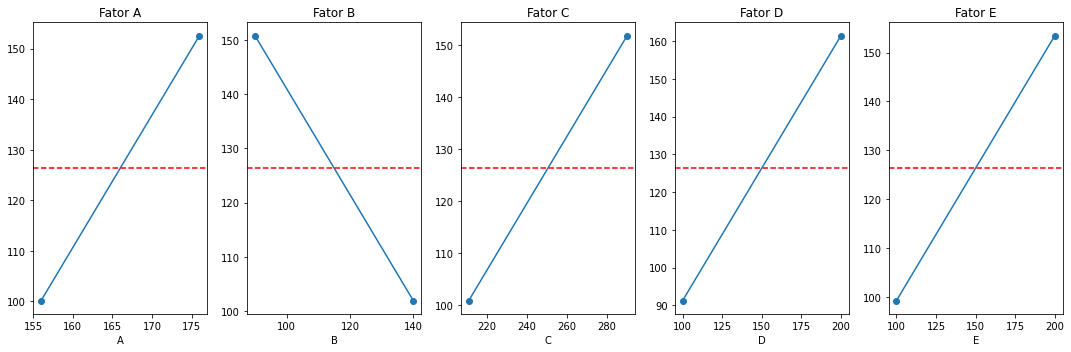

ShapiroResult(statistic=0.8646990060806274, pvalue=0.0008782735094428062)


In [ ]:
#Visualizando, graficamente, os principais efeitos
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, factor in enumerate(['A', 'B', 'C', 'D', 'E']):
    design.groupby(factor).response.mean().plot(ax=axes[i], marker='o')
    axes[i].axhline(design.response.mean(), color='red', linestyle='--')
    axes[i].set_title('Fator {}'.format(factor))

plt.tight_layout()
plt.show()

#Verificando a normalidade dos resíduos com um teste de normalidade
print(shapiro(model2.resid))

O gráfico mostra a média da variável de resposta em relação a cada fator

Os marcadores 'o' indicam a média da variável de resposta para cada nível do fator correspondente

A linha vermelha indica a média geral da variável de resposta em todos os níveis do fator

p < 0,005 --> indicando que os resíduos não seguem uma distribuição normal, sendo, assim, a verificação útil para avaliar a suposição de normalidade dos resíduos do modelo

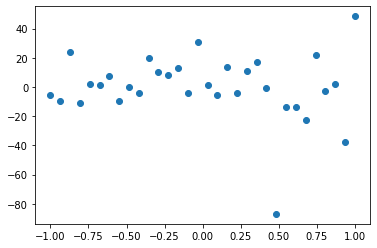

In [ ]:
#Gráfico de dispersão dos resíduos (diferenças entre os valores observados e os valores previstos pelo modelo) do modelo
plt.scatter(np.linspace(-1,1,len(model2.resid)), model2.resid)

Eixo x -> ordem dos resíduos em uma escala linear

Eixo y -> valores dos resíduos

Como estão distribuidos aleatoriamente em torno de 0, indica uma boa relação entre as variáveis

In [ ]:
#Criando uma função para receber dois argumentos, retornando uma lista de nomes de características polinomiais geradas a partir das características de entrada
def get_poly_feature_names(input_features, poly):
    num_input_features = len(input_features)
    degree = poly.degree
    interaction_only = poly.interaction_only
    include_bias = poly.include_bias

    if include_bias:
        feature_names = ['1']
    else:
        feature_names = []

    for degree in range(1, degree + 1):
        for items in itertools.combinations_with_replacement(input_features, degree):
            if not interaction_only or len(set(items)) != 1:
                feature_names.append(' * '.join(items))


    return feature_names

Coeficientes: 
 const    2113.322230
x1        -10.839365
x2        -11.808383
x3         -1.145764
x4         -6.049414
x5         -1.956619
x6          0.059609
x7          0.007450
x8          0.024053
x9          0.007538
x10        -0.003260
x11         0.009406
x12         0.002291
x13         0.004483
x14         0.001718
x15         0.003691
dtype: float64

Equação Polinomial:
2113.322 * const + -10.839 * 1 + -11.808 * A * B + -1.146 * A * C + -6.049 * A * D + -1.957 * A * E + 0.060 * B * C + 0.007 * B * D + 0.024 * B * E + 0.008 * C * D + -0.003 * C * E + 0.009 * D * E


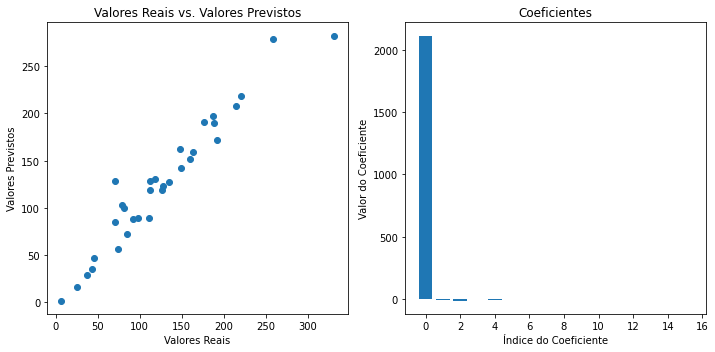

Coeficiente de Determinação (R^2): 0.9351579039002307


In [ ]:
#Definindo variáveis independentes (X) e variável dependente (Y)
X = design[['A', 'B', 'C', 'D', 'E']]
Y = design['response']

#Adicionando termos de interação
poly = PolynomialFeatures(2, interaction_only=True, include_bias=True)
X_poly = poly.fit_transform(X)

#Ajustando o modelo
model = sm.OLS(Y, X_poly)
results = model.fit()

#Imprimindo os coeficientes
print('Coeficientes: \n', results.params)

#Construindo a equação polinomial
poly_feature_names = get_poly_feature_names(X.columns, poly)

equation_terms = [f'{coef:.3f} * {feature}' for coef, feature in zip(results.params, ['const'] + poly_feature_names) if np.abs(coef) > 1e-10]
equation = ' + '.join(equation_terms)

#Imprimindo a equação polinomial
print('\nEquação Polinomial:')
print(equation)

#Realizando previsões
Y_pred = results.predict(X_poly)

#Gráfico de dispersão entre os valores reais (Y) e os valores previstos (Y_pred)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(Y, Y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')

#Gráfico de barras dos coeficientes
plt.subplot(1, 2, 2)
plt.bar(range(len(results.params)), results.params)
plt.xlabel('Índice do Coeficiente')
plt.ylabel('Valor do Coeficiente')
plt.title('Coeficientes')

plt.tight_layout()
plt.show()

#Imprimindo o coeficiente de determinação (R^2)
print('Coeficiente de Determinação (R^2):', results.rsquared)


Os coeficientes representam os pesos atribuídos a cada termo polinomial na equação polinomial ajustada

No primeiro gráfico, como os valores apresentam quase que uma linha perfeita na diagonal, a previsão está boa

**Segundo gráfico???**

Como R^2 = 0.93, ou seja, está próximo de 1, indica um bom ajuste do modelo aos dados

### Otimizando

In [ ]:
#Escolhendo a distância desejada
desired_distance = 100

#Definindo a função objetivo para minimizar a diferença entre a distância prevista e a distância desejada
def objective_function(factor_values):
    A, B, C, D, E = factor_values
    #Calculando a distância prevista usando o modelo de regressão polinomial
    distance = results.predict(poly.fit_transform([[A, B, C, D, E]]))
    return np.abs(distance - desired_distance)

#Definindo a estimativa inciial para os fatores
initial_guess = [156, 90, 211, 100, 100]

#Limites de cada fator
bounds = [(156, 176), (90, 140), (211, 290), (100, 200), (100, 200)]

#Otimizando para encontrar a melhor configuração da catapulta
result = minimize(objective_function, initial_guess, bounds=bounds)

#Valores dos fatores otimizados
optimized_factors = result.x

#Imprimindo os valores otimizados dos fatores
print("Optimized Factor Values:")
print("Release Angle:", optimized_factors[0])
print("Firing Angle:", optimized_factors[1])
print("Cup Elevation:", optimized_factors[2])
print("Pin Elevation:", optimized_factors[3])
print("Bungee Elevation:", optimized_factors[4])

#Distância prevista para a configuração otimizada
optimized_distance = results.predict(poly.fit_transform([optimized_factors]))
print("Predicted Distance:", optimized_distance[0])

Optimized Factor Values:
Release Angle: 156.53887617230578
Firing Angle: 91.4692335476256
Cup Elevation: 211.0000150808769
Pin Elevation: 100.09826940583108
Bungee Elevation: 100.00001932990602
Predicted Distance: 100.00000000110936
